<a href="https://colab.research.google.com/github/claraluisa2/RL/blob/main/taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link do tutorial: https://www.datacamp.com/pt/tutorial/introduction-q-learning-beginner-tutorial

In [ ]:
%%capture
!pip install pyglet==1.5.1
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [ ]:
%%capture
!pip install gym==0.24
!pip install pygame
!pip install numpy

!pip install imageio imageio_ffmpeg

In [ ]:
import numpy as np
import gym
import random
import imageio
from tqdm.notebook import trange

In [ ]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Espaço de observaçao ", env.observation_space) #conjunto de todos os estados possíveis que o agente pode observar no ambiente
print("Amostra", env.observation_space.sample()) #estado gerado aleatoriamente a partir do espaço de observação

Espaço de observaçao Discrete(500)
Amostra 110


In [ ]:
print("Action Space Shape", env.action_space.n) #O atributo n do objeto action_space retorna o número de ações possíveis no espaço de ação.
print("Action Space Sample", env.action_space.sample()) #imprime uma ação de amostra do espaço de ação

Action Space Shape 6
Action Space Sample 0


In [ ]:
#imprime o número de estados e ações possíveis em um determinado ambiente.
state_space = env.observation_space.n
print(state_space, "possiveis estados")
action_space = env.action_space.n
print(action_space, "possiveis açoes")

500 possiveis estados
6 possiveis açoes


In [ ]:
#Cria uma matriz bidimensional NumPy de tamanho state_space por action_space preenchida com zeros, que representa a tabela Q usada no aprendizado por reforço.#
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

Qtable_taxi = initialize_q_table(state_space, action_space)

# Política de Epsilon-greedy
Com uma probabilidade de 1 - ɛ, fazemos exploitation, e com a probabilidade ɛ, fazemos exploration.
Na política epsilon_greedy_policy, faremos o seguinte:

1. Gere o número aleatório entre 0 e 1.
2. Se o número aleatório for maior que epsilon, faremos a exploração. Isso significa que o agente executará a ação com o valor mais alto em um determinado estado.
3. Caso contrário, faremos a exploração (tomar ações aleatórias).

In [ ]:
""" A função recebe três argumentos: uma tabela Q (um dicionário que mapeia os
pares estado-ação para seus valores estimados), um estado (uma tupla que
representa o estado atual do ambiente) e um valor epsilon (um valor flutuante
entre 0 e 1 que determina a probabilidade de realizar uma ação aleatória). """

def epsilon_greedy_policy(Qtable, state, epsilon):
  random_int = random.uniform(0,1)
  if random_int > epsilon:
    action = np.argmax(Qtable[state]) #selecionará a ação com o maior valor estimado na tabela Q para o estado atual
  else:
    action = env.action_space.sample() #ação aleatória
  return action

# Política Gananciosa


In [ ]:
"""
Função que retorna o índice da ação com o valor Q mais alto para o estado atual
Qtable: matriz com os valores Q de cada par estado-ação
state: estado atual do agente
"""
def greedy_policy(Qtable, state):
  action = np.argmax(Qtable[state])
  return action

# Hiperparâmetros do modelo
O agente precisa explorar um espaço de estado suficiente para aprender uma boa aproximação de valores; precisamos ter um decaimento progressivo do épsilon. Se a taxa de decaimento for alta, o agente poderá ficar preso, pois não explorou espaço de estado suficiente.

In [ ]:
# Training parameters
n_training_episodes = 50000
learning_rate = 0.7

# Evaluation parameters
n_eval_episodes = 100

# Environment parameters
env_id = "Taxi-v3"
max_steps = 99
gamma = 0.95
eval_seed = []

# Exploration parameters
max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.0005

# Treinamento de modelos
No loop de treinamento, nós faremos:

1. Crie um loop para episódios de treinamento.
2. Primeiro, reduziremos o epsilon. Como precisamos de cada vez menos exploração e mais exploração a cada episódio.
1. Redefinir o ambiente.
1. Crie um loop aninhado para as etapas máximas.
1. Escolha a ação usando a política epsilon greedy.
1. Realize a ação (At) e observe a recompensa esperada (Rt+1) e o estado (St+1).
1. Realize a ação (a) e observe o estado do resultado (s') e a recompensa (r).
1. Atualize a função Q usando a fórmula.
1. Se `done= True`, finaliza o episódio e interrompe o loop.
1. Por fim, altere o estado atual para um novo estado.
1. Após a conclusão de todos os episódios de treinamento, a função retornará o Q-Table atualizado.

In [ ]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in trange(n_training_episodes):

    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False

    # repeat
    for step in range(max_steps):

      action = epsilon_greedy_policy(Qtable, state, epsilon)


      new_state, reward, done, info = env.step(action)


      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If done, finish the episode
      if done:
        break

      # Our state is the new state
      state = new_state
  return Qtable

In [ ]:
Qtable_taxi = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_taxi)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
Qtable_taxi

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.75200369,  3.94947757,  2.75200369,  3.94947757,  5.20997639,
        -5.05052243],
       [ 7.93349184,  9.40367562,  7.93349184,  9.40367562, 10.9512375 ,
         0.40367562],
       ...,
       [10.94966504, 12.58025   , 10.950845  ,  9.39904701,  1.95121998,
         1.9512367 ],
       [ 5.14397217,  6.53681725,  4.80256707,  6.53670036, -3.79600911,
        -3.79753869],
       [16.1       , 14.295     , 16.1       , 18.        ,  7.1       ,
         7.1       ]])

In [ ]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):

  episode_rewards = []
  for episode in range(n_eval_episodes):
    if seed:
      state = env.reset(seed=seed[episode])
    else:
      state = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0

    for step in range(max_steps):
      # Take the action (index) that have the maximum reward
      action = np.argmax(Q[state][:])
      new_state, reward, done, info = env.step(action)
      total_rewards_ep += reward

      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [ ]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_taxi, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

Mean_reward=8.23 +/- 2.81


In [ ]:
def record_video(env, Qtable, out_directory, fps=1):
  images = []
  done = False
  state = env.reset(seed=random.randint(0,500))
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(Qtable[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py:390: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


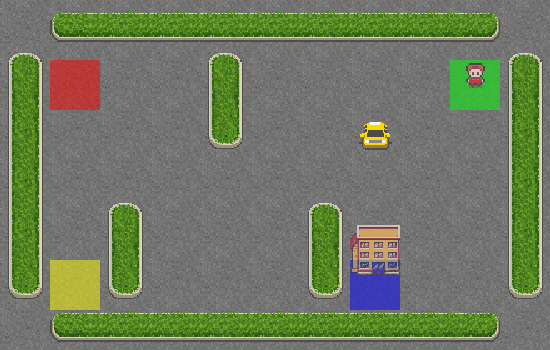

In [ ]:
video_path="/content/replay.gif"
video_fps=1
record_video(env, Qtable_taxi, video_path, video_fps)

from IPython.display import Image
Image('./replay.gif')